In [1]:
# Installing Needed Packages

!pip install pandas numpy matplotlib seaborn python-dateutil pytz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Emmanuel Cerrer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Importing All Libraries

import numpy as np                 # handles numerical data (arrays, math)
import pandas as pd                # handles tables (Series, DataFrames)
import matplotlib.pyplot as plt    # makes charts and graphs
import seaborn as sns              # makes prettier statistical charts
import zipfile                     # lets Python open ZIP files
import os                          # lets Python work with folders

In [3]:
# File Location

zip_path = r"C:\Users\Emmanuel Cerrer\Desktop\names.zip"

In [4]:
# Creating a Folder to Extract the Files

extract_folder = "names_data"
os.makedirs(extract_folder, exist_ok=True)

In [5]:
# Extracting (Unzipping) Txt Files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [6]:
# Loading One Year of Data

df_2015 = pd.read_csv(
    f"{extract_folder}/yob2015.txt",
    names=["name", "sex", "births"]
)

df_2015.head()

,name,sex,births
0,Emma,F,20485
1,Olivia,F,19726
2,Sophia,F,17451
3,Ava,F,16410
4,Isabella,F,15661


In [7]:
# Loading All Years into One Big DataFrame

all_files = [f for f in os.listdir(extract_folder) if f.endswith(".txt")]

df_list = []

for file in all_files:
    year = int(file[3:7])  # get 4 digits from 'yob2015.txt'
    temp_df = pd.read_csv(
        f"{extract_folder}/{file}",
        names=["name", "sex", "births"]
    )
    temp_df["year"] = year  # add the year column
    df_list.append(temp_df)

df_all = pd.concat(df_list, ignore_index=True)
df_all.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
# Basic Data Checks

## Show First Rows
df_all.head()

## Seeing Dataset Size
df_all.shape

(2149477, 4)

In [13]:
# Exploratory Data Analysis

## Most Popular Names per Year (Top Birth Count)
df_all.groupby(["year", "sex"])["births"].max()

## Look at All Rows Where Name = Emma
df_all[df_all["name"] == "Emma"]

## Top 10 Most Popular Names across All Years
df_all.groupby("name")["births"].sum().sort_values(ascending=False).head(10)

name
James      5262396
John       5196210
Robert     4866007
Michael    4440391
William    4205026
Mary       4154332
David      3682683
Joseph     2672746
Richard    2585535
Charles    2441151
Name: births, dtype: int64

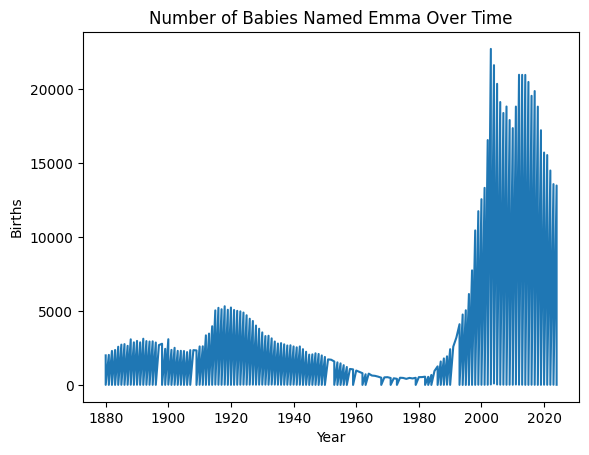

Text(0.5, 1.0, 'Trend of Emma Over Time')

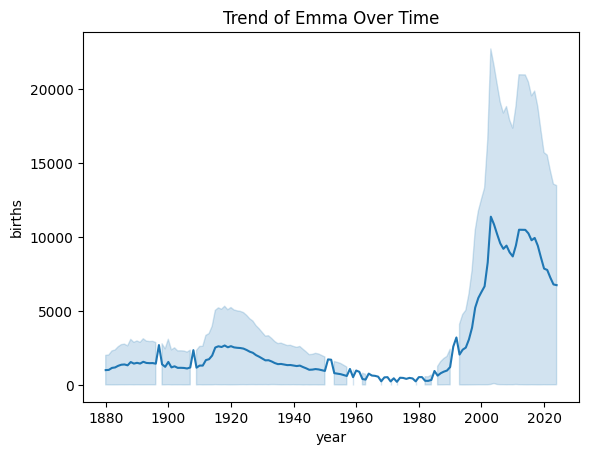

In [15]:
# Plotting

## Trend of Emma over Time
emma = df_all[df_all["name"] == "Emma"]

plt.plot(emma["year"], emma["births"])
plt.title("Number of Babies Named Emma Over Time")
plt.xlabel("Year")
plt.ylabel("Births")
plt.show()

## Seaborn Line Chart

sns.lineplot(data=emma, x="year", y="births")
plt.title("Trend of Emma Over Time")